In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from pathlib import Path  

In [99]:
disruptions = pd.read_csv('disruptions-2022.csv')
disruptions.head()

,rdt_id,ns_lines,rdt_lines,rdt_lines_id,rdt_station_names,rdt_station_codes,cause_nl,cause_en,statistical_cause_nl,statistical_cause_en,cause_group,start_time,end_time,duration_minutes
0,40500,Den Haag-Rotterdam; Leiden-Rotterdam,Den Haag HS - Rotterdam Centraal,11,"Delft,Delft Campus,Den Haag HS,Den Haag Moerwi...","DT, DTCP, GV, GVMW, RSW",brandmelding,fire alarm,brandmelding,fire alarm,external,2022-01-01 05:45:33,2022-01-01 06:34:58,49.0
1,40501,Amsterdam-Utrecht; Utrecht-Eindhoven,"'s-Hertogenbosch - Utrecht Centraal, Amsterdam...","136,151","Abcoude,Amsterdam Amstel,Amsterdam Bijlmer Are...","AC, ASA, ASB, ASD, ASDM, ASHD, BKL, CL, DVD, G...",herstelwerkzaamheden,repair works,herstelwerkzaamheden,repair works,engineering work,2022-01-01 06:23:54,2022-01-01 13:59:14,455.0
2,40502,Schiphol-Rotterdam (HSL),Rotterdam Centraal - Schiphol Airport (HSL),24,"Rotterdam Centraal,Schiphol Airport","RTD, SHL",brandmelding,fire alarm,brandmelding,fire alarm,external,2022-01-01 06:33:40,2022-01-01 06:34:27,1.0
3,40503,Eindhoven-Venlo,Eindhoven - Venlo,65,"Blerick,Deurne,Horst-Sevenum,Venlo","BR, DN, HRT, VL",aanrijding,collision,aanrijding,collision,accidents,2022-01-01 07:31:39,2022-01-01 11:26:38,235.0
4,40504,Alkmaar-Den Helder; Alkmaar-Hoorn,"Alkmaar - Den Helder, Alkmaar - Hoorn","162,163","Alkmaar Noord,Heerhugowaard","AMRN, HWD",aanrijding,collision,aanrijding,collision,accidents,2022-01-01 07:32:32,2022-01-01 07:42:25,10.0


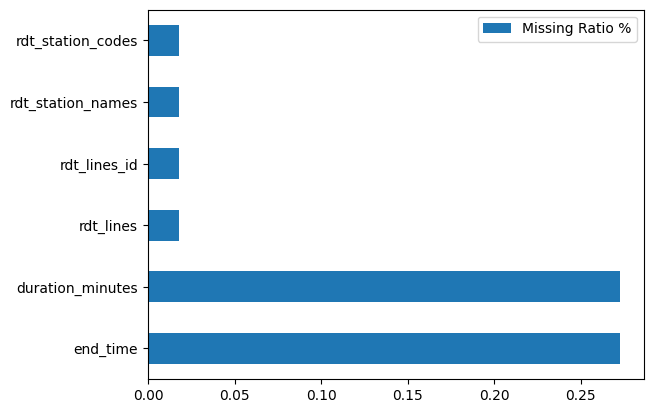

In [100]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(disruptions)

In [101]:
def plot_bar_chart(label):
    grouped_data = disruptions.groupby(label).size()
    
    # Plot the bar chart
    grouped_data.plot(kind='bar', color='navajowhite', edgecolor='black')
    
    # Add labels and title
    plt.xlabel(label)
    plt.ylabel('Count')
    plt.title('Distribution of ' + label)
    
    # Add percentages on top of each bar
    total_count = len(disruptions)  # Total number of entries in the DataFrame
    for i, value in enumerate(grouped_data):
        percentage = (value / total_count) * 100
        plt.text(i, value + 0.1, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=8)
    
    # Show the plot
    plt.show()

In [102]:
disruptions.drop("cause_nl", inplace = True, axis = 1)
disruptions.drop("cause_en", inplace = True, axis = 1)
disruptions.drop("statistical_cause_nl", inplace = True, axis = 1)
disruptions.drop("statistical_cause_en", inplace = True, axis = 1)
disruptions.drop("rdt_id", inplace = True, axis = 1)
disruptions.drop("rdt_lines_id", inplace = True, axis = 1)
disruptions.drop("ns_lines", inplace = True, axis = 1)

In [103]:
disruptions.head()

,rdt_lines,rdt_station_names,rdt_station_codes,cause_group,start_time,end_time,duration_minutes
0,Den Haag HS - Rotterdam Centraal,"Delft,Delft Campus,Den Haag HS,Den Haag Moerwi...","DT, DTCP, GV, GVMW, RSW",external,2022-01-01 05:45:33,2022-01-01 06:34:58,49.0
1,"'s-Hertogenbosch - Utrecht Centraal, Amsterdam...","Abcoude,Amsterdam Amstel,Amsterdam Bijlmer Are...","AC, ASA, ASB, ASD, ASDM, ASHD, BKL, CL, DVD, G...",engineering work,2022-01-01 06:23:54,2022-01-01 13:59:14,455.0
2,Rotterdam Centraal - Schiphol Airport (HSL),"Rotterdam Centraal,Schiphol Airport","RTD, SHL",external,2022-01-01 06:33:40,2022-01-01 06:34:27,1.0
3,Eindhoven - Venlo,"Blerick,Deurne,Horst-Sevenum,Venlo","BR, DN, HRT, VL",accidents,2022-01-01 07:31:39,2022-01-01 11:26:38,235.0
4,"Alkmaar - Den Helder, Alkmaar - Hoorn","Alkmaar Noord,Heerhugowaard","AMRN, HWD",accidents,2022-01-01 07:32:32,2022-01-01 07:42:25,10.0


In [104]:
disruptions = disruptions[disruptions['duration_minutes'] > 20]
print(len(disruptions))

3771


In [105]:
values_to_remove = ['unknown', 'weather']
disruptions['cause_group'] = disruptions['cause_group'].replace(values_to_remove, pd.NA)

# Drop rows with NaN values in 'Railroad company' column
disruptions = disruptions.dropna(subset=['cause_group'])

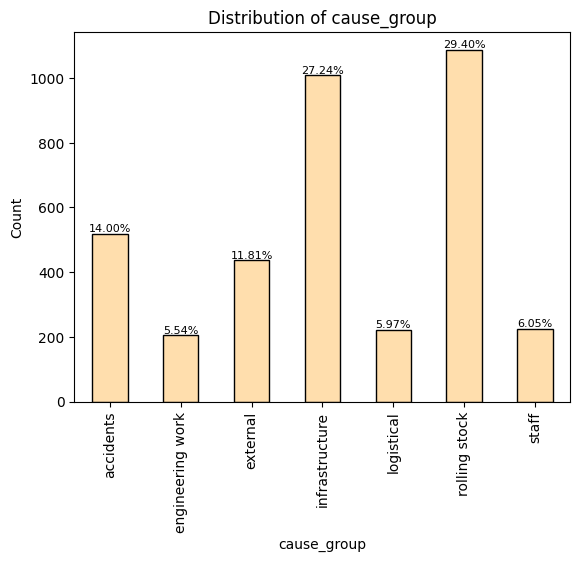

In [106]:
plot_bar_chart('cause_group')

In [107]:
disruptions = disruptions.dropna()

#### Taking ethical aspects into account
##### Now as you can see from the bar chart above, almost 1 disruption out of 10 was caused by issues connected to the staff. 

The most logical step is, of course, to leave things as they are now, since more entries in the disruption dataset means more data for the model. 

__However, I believe that it would be unethical to include personell-caused disruptions.__
Imagine the following situation: for example the Breda station is understuffed because part of the employees are striking for better working conditions. Therefore most of the disruptions occuring at the Breda station fall into the 'staff' category. The model sees that strikes cause severe disruptions, and therefore puts higher delay estimates for journeys that pass through Breda. 
From this point there could be a few scenarios how this could play out, for example the people who would use my future app see higher delays, and blame the strikers for causing them. As you can see, it is better to avoid such sensitive topic, so I think the best approach would be to remove all disruptions that are caused by NS employees.

In [108]:
disruptions['cause_group'] = disruptions['cause_group'].replace("staff", pd.NA)
disruptions = disruptions.dropna(axis=0, subset=['cause_group'])

##### Final step: 
Removing all remaining NaN values

In [109]:
disruptions = disruptions.dropna()

In [110]:
disruptions.to_csv('preprocessed_data/disruptions_preprocessed.csv', index=False)

In [111]:
disruptions.dtypes

rdt_lines             object
rdt_station_names     object
rdt_station_codes     object
cause_group           object
start_time            object
end_time              object
duration_minutes     float64
dtype: object